In [2]:
# import spark and initialize session
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder.appName('MSD').getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
sc.install_pypi_package("pandas")
sc.install_pypi_package("matplotlib")
sc.install_pypi_package("IPython")
sc.install_pypi_package("seaborn")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/bf/4c/cb7da76f3a5e077e545f9cf8575b8f488a4e8ad60490838f89c5cdd5bb57/pandas-1.1.4-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/30/f2/10c822cb0ca5ebec58bd1892187bc3e3db64a867ac26531c6204663fc218/matplotlib-3.3.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/af/fa/c1302a26d5e1a17fa8e10e43417b6cf038b0648c4b79fcf2302a4a0c5d30/Pillow-8.0.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using ca

In [9]:
sc.install_pypi_package("sklearn")
from sklearn.metrics import roc_curve

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/f4/cb/64623369f348e9bfb29ff898a57ac7c91ed4921f228e9726546614d63ccb/scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/12/ec3f2e203afa394a149911729357aa48affc59c20e2c1c8297a60f33f133/threadpoolctl-2.1.0-py3-none-any.whl

In [10]:
# import libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LinearSVC, LogisticRegression, RandomForestClassifier, GBTClassifier, MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
import pandas as pd
import sklearn.metrics as metrics
from matplotlib import pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
# read from s3
df_raw = spark.read.csv("s3a://msd-bucket-10605/msd-data/*.csv", header=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
# rename
col_names = ['analyzer_version', 'artist_7digitalid', 'artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_mbid', 'artist_name', 'artist_playmeid', 'genre', 'idx_artist_terms', 'idx_similar_artists', 'release', 'release_7digitalid', 'song_hotttnesss', 'song_id', 'title', 'track_7digitalid', 'analysis_sample_rate', 'audio_md5', 'danceability', 'duration', 'end_of_fade_in', 'energy', 'idx_bars_confidence', 'idx_bars_start', 'idx_beats_confidence', 'idx_beats_start', 'idx_sections_confidence', 'idx_sections_start', 'idx_segments_confidence', 'idx_segments_loudness_max', 'idx_segments_loudness_max_time', 'idx_segments_loudness_start', 'idx_segments_pitches', 'idx_segments_start', 'idx_segments_timbre', 'idx_tatums_confidence', 'idx_tatums_start', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'track_id', 'idx_artist_mbtags', 'year']
df = df_raw.toDF(*col_names)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
df.count()
#total 999266 records(rows)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

999266

### The following part: data preprocessing ###

1. Feature Selection: drop some irrelated features
2. Data Cleaning: drop duplicates, filter out outliers, handle missing data
3. Feature Engineer

In [27]:
# drop columns
drop_cols = ['idx_tatums_start', 'idx_similar_artists', 'idx_bars_start', 'idx_beats_start', 'idx_sections_start', 'idx_segments_loudness_max', 'idx_artist_terms', 'idx_similar_artists', 'analyzer_version', 'artist_7digitalid', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_mbid', 'artist_playmeid', 'genre', 'release_7digitalid', 'song_id', 'track_7digitalid', 'analysis_sample_rate', 'audio_md5', 'idx_bars_confidence', 'idx_beats_confidence', 'idx_sections_confidence', 'idx_segments_confidence', 'idx_segments_loudness_max_time', 'idx_segments_loudness_start', 'idx_segments_pitches', 'idx_segments_start', 'idx_segments_timbre', 'idx_tatums_confidence', 'track_id']
df = df.drop(*drop_cols)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
print(df.columns)
print("\nNumber of features after selection: "+str(len(df.columns)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['artist_familiarity', 'artist_hotttnesss', 'artist_name', 'release', 'song_hotttnesss', 'title', 'danceability', 'duration', 'end_of_fade_in', 'energy', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'idx_artist_mbtags', 'year']

Number of features after selection: 21

In [30]:
from pyspark.sql.functions import col

str_columns = ['artist_name', 'release', 'title']
float_columns = [col for col in df.columns if col not in str_columns]
print(float_columns)
#cast string value to float
for col_name in float_columns:
    df = df.withColumn(col_name, col(col_name).cast('float'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['artist_familiarity', 'artist_hotttnesss', 'song_hotttnesss', 'danceability', 'duration', 'end_of_fade_in', 'energy', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'idx_artist_mbtags', 'year']

In [31]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- artist_familiarity: float (nullable = true)
 |-- artist_hotttnesss: float (nullable = true)
 |-- artist_name: string (nullable = true)
 |-- release: string (nullable = true)
 |-- song_hotttnesss: float (nullable = true)
 |-- title: string (nullable = true)
 |-- danceability: float (nullable = true)
 |-- duration: float (nullable = true)
 |-- end_of_fade_in: float (nullable = true)
 |-- energy: float (nullable = true)
 |-- key: float (nullable = true)
 |-- key_confidence: float (nullable = true)
 |-- loudness: float (nullable = true)
 |-- mode: float (nullable = true)
 |-- mode_confidence: float (nullable = true)
 |-- start_of_fade_out: float (nullable = true)
 |-- tempo: float (nullable = true)
 |-- time_signature: float (nullable = true)
 |-- time_signature_confidence: float (nullable = true)
 |-- idx_artist_mbtags: float (nullable = true)
 |-- year: float (nullable = true)

In [32]:
df_model = df.filter(df['song_hotttnesss'] >= 0)
df_model = df_model.filter(df_model['song_hotttnesss'] <= 1)
df_model = df_model.filter(df_model['year'] > 0)
# df_lr = df_no_yr.filter(df_no_yr['song_hotttnesss'] > 0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
df_model.select('loudness').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+
|loudness|
+--------+
|  -4.528|
|  -5.156|
|  -9.201|
|  -4.576|
|  -9.973|
|  -7.821|
|  -3.132|
|  -4.408|
|  -8.464|
| -15.791|
|  -4.448|
|  -14.59|
|  -9.317|
|  -6.456|
| -12.468|
| -10.019|
| -22.918|
|  -8.993|
|  -9.025|
| -20.517|
+--------+
only showing top 20 rows

In [35]:
df_model.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

345843

In [45]:
# df_model.select('artist_familiarity', 'artist_hotttnesss', 'idx_artist_terms', 'idx_similar_artists', 'song_hotttnesss', 'danceability', 'duration', 'end_of_fade_in', 'energy', 'idx_bars_start', 'idx_beats_start', 'idx_sections_start', 'idx_segments_loudness_max', 'idx_tatums_start', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'idx_artist_mbtags', 'year')
df_model.select('artist_familiarity', 'artist_hotttnesss', 'song_hotttnesss', 'danceability', 'duration', 'end_of_fade_in', 'energy', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'idx_artist_mbtags', 'year')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[artist_familiarity: float, artist_hotttnesss: float, song_hotttnesss: float, danceability: float, duration: float, end_of_fade_in: float, energy: float, key: float, key_confidence: float, loudness: float, mode: float, mode_confidence: float, start_of_fade_out: float, tempo: float, time_signature: float, time_signature_confidence: float, idx_artist_mbtags: float, year: float]

In [47]:
pd.set_option('max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print(df_model.select('artist_familiarity', 'artist_hotttnesss', 'song_hotttnesss', 'duration', 'key', 'loudness', 'mode', 'end_of_fade_in', 'start_of_fade_out', 'tempo', 'time_signature', 'year').toPandas().describe())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       artist_familiarity  artist_hotttnesss  song_hotttnesss    duration  \
count         345842.0000        345843.0000      345843.0000 345843.0000   
mean               0.6080             0.4223           0.4307    245.9093   
std                0.1183             0.0992           0.2146    112.3485   
min                0.0000             0.0000           0.0000      0.6787   
25%                0.5339             0.3700           0.3042    185.2599   
50%                0.6056             0.4151           0.4592    230.8175   
75%                0.6839             0.4723           0.5813    284.7603   
max                1.0000             1.0825           1.0000   3007.7383   

              key    loudness        mode  end_of_fade_in  start_of_fade_out  \
count 345843.0000 345843.0000 345843.0000     345843.0000        345843.0000   
mean       5.3097     -9.4423      0.6620          0.8805           236.6045   
std        3.5948      4.8448      0.4730          3.8011         

In [50]:
pd.set_option('display.expand_frame_repr', False)
print(df_raw.select('idx_similar_artists', 'idx_bars_start', 'idx_beats_start', 'idx_sections_start', 'idx_segments_loudness_max').toPandas().describe())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [72]:
corr = df_model.select('artist_familiarity', 'artist_hotttnesss', 'song_hotttnesss', 'duration', 'key', 'loudness', 'mode', 'end_of_fade_in', 'start_of_fade_out', 'tempo', 'time_signature', 'year').toPandas().corr()
import seaborn as sns
plt.figure(figsize = (12,12))
plt.title('Correlation between features')
sns.heatmap(corr)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<AxesSubplot:title={'center':'Correlation between features'}>

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

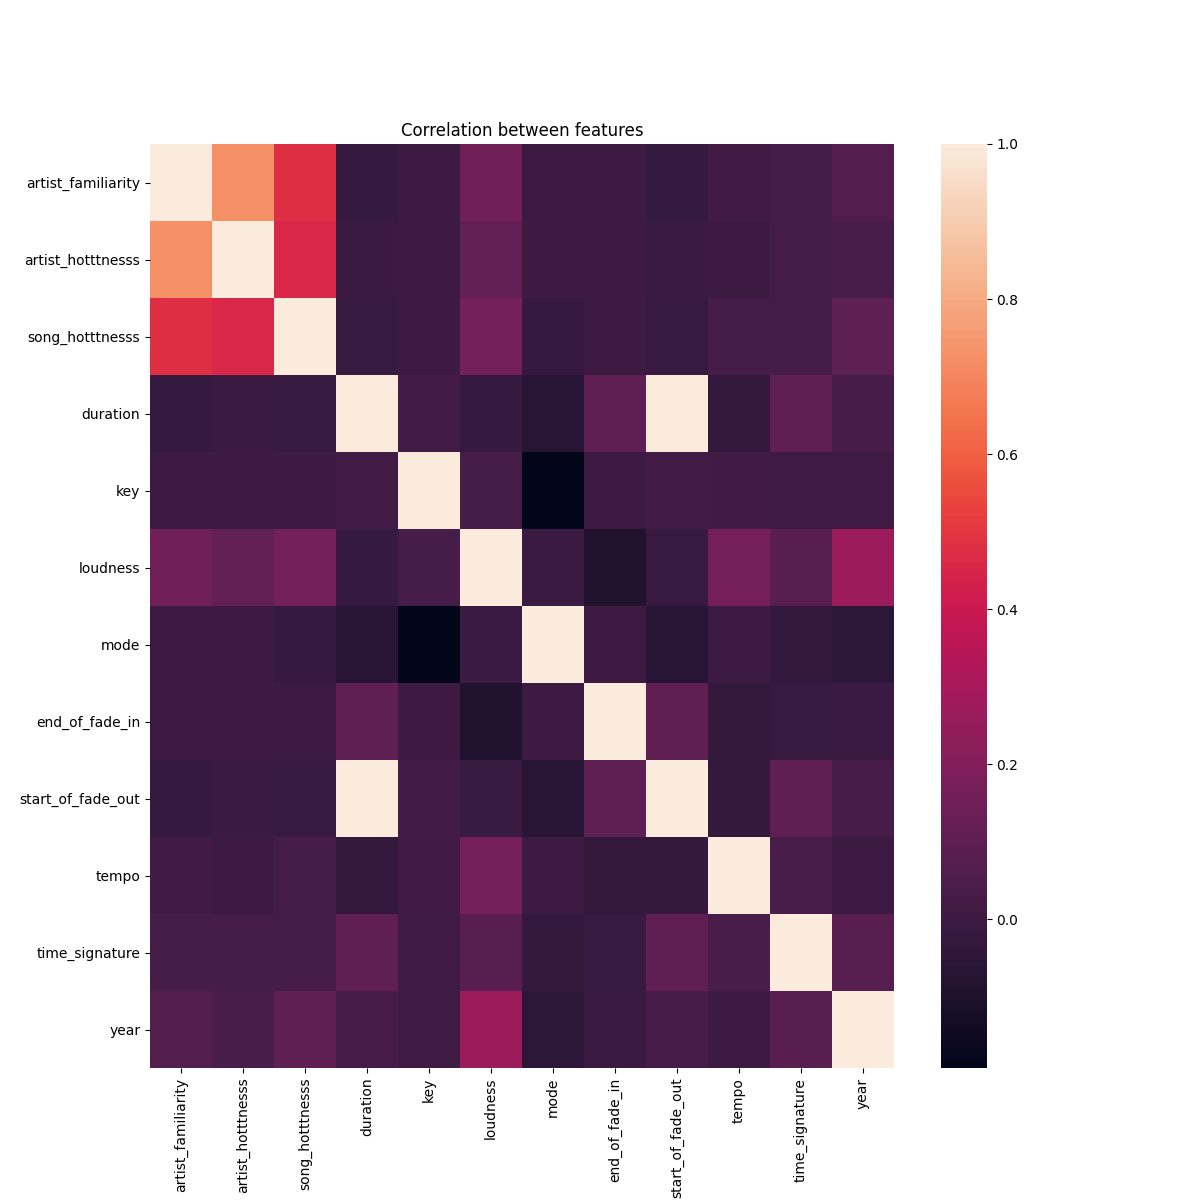

In [73]:
%matplot plt

In [51]:
# baseline
df_base = df_model
artist_hotness_mean = df_base.select(avg('artist_hotttnesss')).collect()[0]['avg(artist_hotttnesss)']
artist_hotness_mean

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.42233044703029526

In [52]:
df_base = df_base.withColumn("prediction", lit(0))
df_base = df_base.withColumn("prediction", when(col("artist_hotttnesss") > artist_hotness_mean, 1).otherwise(0))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
song_hotness_mean = df_base.select(avg('song_hotttnesss')).collect()[0]['avg(song_hotttnesss)']
song_hotness_mean

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.4306739799357913

In [54]:
df_base = df_base.withColumn("isPopular", lit(0))
df_base = df_base.withColumn("isPopular",when(col("song_hotttnesss") > song_hotness_mean, 1).otherwise(0))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
_, baseline_test = df_base.randomSplit([0.8, 0.2], seed=10000)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [56]:
base_accuracy = baseline_test.filter(baseline_test.isPopular == baseline_test.prediction).count()/float(baseline_test.count())
print("Baseline Accuracy: ", base_accuracy)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Baseline Accuracy:  0.6620129587122643

In [57]:
# Logistic Regression
df_lr = df_model
song_hotness_mean = df_lr.select(avg('song_hotttnesss')).collect()[0]['avg(song_hotttnesss)']
song_hotness_mean

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.4306739799357913

In [58]:
df_lr = df_lr.withColumn("isPopular", lit(0))
df_lr = df_lr.withColumn("isPopular",when(col("song_hotttnesss") > song_hotness_mean, 1).otherwise(0))
df_lr = df_lr.fillna(0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [65]:
# assembly all features and normalize each feature
from pyspark.ml.feature import VectorAssembler, StandardScaler
feat_columns = ['artist_familiarity', 'artist_hotttnesss', 'danceability', 'duration', 'end_of_fade_in', 'energy', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'idx_artist_mbtags', 'year']
# feat_columns = ['artist_familiarity', 'artist_hotttnesss', 'duration', 'loudness', 'start_of_fade_out']
assembler = VectorAssembler().setInputCols(feat_columns).setOutputCol('features')
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
assembler_df = assembler.transform(df_lr)
scalerModel = scaler.fit(assembler_df)
scaler_df = scalerModel.transform(assembler_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [66]:
# can be used for different models
train, test = scaler_df.randomSplit([0.8, 0.2], seed=10000)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [67]:
# LogisticRegression training
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol='scaledFeatures', labelCol='isPopular', maxIter=30)
lrModel = lr.fit(train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [68]:
# LR Model Evaluation
lr_predictions = lrModel.transform(test)
lr_accuracy = lr_predictions.filter(lr_predictions.isPopular == lr_predictions.prediction).count()/float(lr_predictions.count())
print("LR Accuracy: ", lr_accuracy)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

LR Accuracy:  0.702574309207659

In [69]:
print(lrModel.intercept)
print(lrModel.coefficients)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.20401905156117928
[0.6367514895318329,0.5548981162305991,0.0,-0.004108259142917876,0.023855556465140874,0.0,-0.018526728423946877,-0.030016224830280113,0.19894158886410127,-0.0538360205887753,0.03333536881772706,-0.010922528335240052,0.025061192503784226,-0.008505580511646684,0.0041880839208644945,0.0,-0.025235715552670557]

In [74]:
# Random Forest Classifier
from pyspark.ml.classification import RandomForestClassifier
# from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="isPopular", featuresCol="scaledFeatures", maxDepth=20, numTrees=20)
# Train model.  This also runs the indexers.
rfModel = rf.fit(train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [75]:
# Make predictions.
rf_predictions = rfModel.transform(test)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="isPopular", predictionCol="prediction", metricName="accuracy")
rf_accuracy = evaluator.evaluate(rf_predictions)
print("Accuracy = %g" % (rf_accuracy))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy = 0.716506

In [76]:
# treeModel = model.stages[2]
# summary only
feat_importances = list(rfModel.featureImportances)
# feat_columns = ['artist_familiarity', 'artist_hotttnesss', 'idx_artist_terms', 'danceability', 'duration', 'end_of_fade_in', 'energy', 'idx_bars_start', 'idx_beats_start', 'idx_sections_start', 'idx_segments_loudness_max', 'idx_tatums_start', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence']
feat_importances

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[0.21858486842191435, 0.16268798740835097, 0.0, 0.04808271635697879, 0.04669647329640812, 0.0, 0.04934617383491787, 0.06367382186463906, 0.07179487281239932, 0.011436228507597714, 0.06440303788602951, 0.05524588016548145, 0.06526567535447322, 0.022604921077775286, 0.05273229080589943, 0.0, 0.06744505220713493]

In [77]:
# gradient boosting
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="isPopular", featuresCol="scaledFeatures", maxIter=30)
gbModel = gbt.fit(train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [78]:
gb_predictions = gbModel.transform(test)
gb_evaluator = MulticlassClassificationEvaluator(labelCol="isPopular", predictionCol="prediction", metricName="accuracy")
gb_accuracy = gb_evaluator.evaluate(gb_predictions)
print("Accuracy =", str(gb_accuracy))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy = 0.7147247267561534

In [84]:
from pyspark.ml.classification import MultilayerPerceptronClassifier

layers = [21, 48, 20, 2]
mlp = MultilayerPerceptronClassifier(featuresCol="scaledFeatures", labelCol="isPopular", maxIter=100, layers=layers, blockSize=512)
mlpModel = mlp.fit(train.select('scaledFeatures', 'isPopular'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
An error occurred while calling o2279.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 4 in stage 597.0 failed 4 times, most recent failure: Lost task 4.3 in stage 597.0 (TID 3132, ip-172-31-35-149.ec2.internal, executor 21): java.lang.ArrayIndexOutOfBoundsException
	at java.lang.System.arraycopy(Native Method)
	at org.apache.spark.ml.ann.DataStacker$$anonfun$5$$anonfun$apply$3$$anonfun$apply$4.apply(Layer.scala:665)
	at org.apache.spark.ml.ann.DataStacker$$anonfun$5$$anonfun$apply$3$$anonfun$apply$4.apply(Layer.scala:664)
	at scala.collection.immutable.List.foreach(List.scala:392)
	at org.apache.spark.ml.ann.DataStacker$$anonfun$5$$anonfun$apply$3.apply(Layer.scala:664)
	at org.apache.spark.ml.ann.DataStacker$$anonfun$5$$anonfun$apply$3.apply(Layer.scala:660)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:410)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:410)
	at org.apache.spark.storage.memory.MemorySto

In [85]:
mlp_result = mlpModel.transform(test.select('scaledFeatures', 'isPopular'))
mlp_result = mlp_result.select("prediction", "isPopular")
mlp_evaluator = MulticlassClassificationEvaluator(labelCol="isPopular", predictionCol="prediction", metricName="accuracy")
mlp_accuracy = mlp_evaluator.evaluate(mlp_result)
print("Accuracy = %g" % (mlp_accuracy))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
name 'mlpModel' is not defined
Traceback (most recent call last):
NameError: name 'mlpModel' is not defined



In [24]:
# SVM
from pyspark.ml.classification import LinearSVC
svm = LinearSVC(featuresCol="scaledFeatures", labelCol="isPopular", maxIter=30)
svmModel = svm.fit(train)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
svm_result = svmModel.transform(test)
svm_evaluator = MulticlassClassificationEvaluator(labelCol="isPopular", predictionCol="prediction", metricName="accuracy")
svm_accuracy = svm_evaluator.evaluate(svm_result)
print("Accuracy = %g" % (svm_accuracy))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy = 0.55591

In [ ]:
# Naive Bayes
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(featuresCol="scaledFeatures", labelCol="isPopular", smoothing=1.0, modelType="multinomial")
nbModel = nb.fit(train)

In [ ]:
nb_predictions = model.transform(test)
nb_evaluator = MulticlassClassificationEvaluator(labelCol="isPopular", predictionCol="prediction", metricName="accuracy")
nb_accuracy = nb_evaluator.evaluate(nb_predictions)
print("Test set accuracy = " + str(nb_accuracy))

In [38]:
accuracies = [base_accuracy, lr_accuracy, rf_accuracy, gb_accuracy, mlp_accuracy]
accuracies

VBox()

An error was encountered:
Session 5 did not reach idle status in time. Current status is busy.


In [37]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [42]:
# predictionAndLabels = test.map(lambda lp: (float(svmModel.predict(lp.features)), lp.label))
metrics = BinaryClassificationMetrics(svm_result.select('prediction', 'isPopular').rdd.map(lambda row: (float(row['prediction']), float(row['isPopular']))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [43]:
metrics.areaUnderROC

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.5

In [35]:
# ROC
print(svmModel.summary.roc.select('FPR').collect())
print(svmModel.summary.roc.select('TPR').collect())
print(gbModel.summary.roc.select('FPR').collect())
print(gbModel.summary.roc.select('TPR').collect())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
'GBTClassificationModel' object has no attribute 'summary'
Traceback (most recent call last):
AttributeError: 'GBTClassificationModel' object has no attribute 'summary'



In [26]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
preds = gb_predictions.select('rawPrediction', 'isPopular').rdd.map(lambda row: (float(row['rawPrediction']), float(row['isPopular']))).collect()

In [80]:
import sklearn.metrics as metrics
y_score, y_true = zip(*preds)
fpr, tpr, thresholds = roc_curve(y_true, y_score, drop_intermediate=False)
plt.plot(fpr,tpr)
plt.show()
print(fpr, tpr, thresholds)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
type object argument after * must be an iterable, not PipelinedRDD
Traceback (most recent call last):
TypeError: type object argument after * must be an iterable, not PipelinedRDD



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

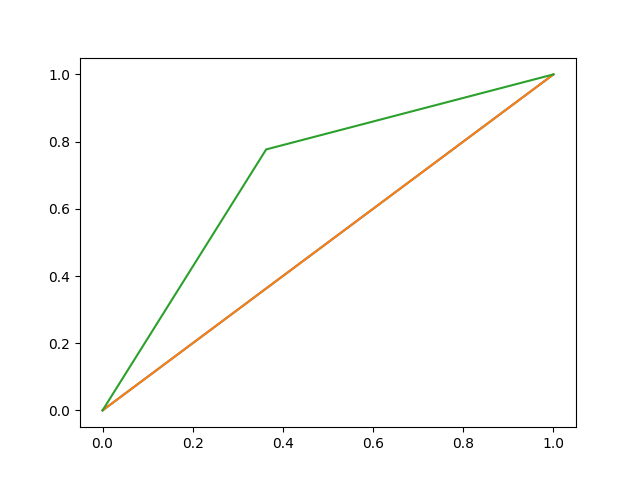

In [60]:
%matplot plt

In [66]:
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets 
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter, 
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2, 
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [86]:
# preds = predictions.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
preds = mlp_result.select('prediction', 'isPopular').rdd.map(lambda row: (float(row['prediction']), float(row['isPopular'])))
points = CurveMetrics(preds).get_curve('roc')

plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
print(x_val, y_val)
# plt.title(title)
# plt.xlabel(xlabel)
# plt.ylabel(ylabel)
plt.plot(x_val, y_val)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[0.0, 0.4007050528789659, 1.0, 1.0] [0.0, 0.7847793078171632, 1.0, 1.0]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

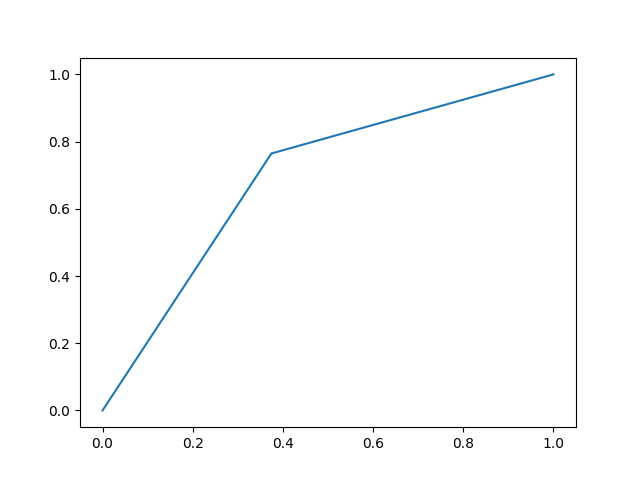

In [78]:
%matplot plt